In [8]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from dask_ml.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import dump, load
import pickle

In [9]:
df = pd.read_csv('../global_preprocessed_without_onehot.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]


,iyear,extended,region,nkill,nwound,attacktype1,nperps,suicide,success,gname
0,-2.952239,0,2,0.095379,0.000000,1,-0.048337,0,1,0
1,-2.952239,0,1,0.000000,0.000000,6,0.290024,0,1,1
2,-2.952239,0,5,0.095379,0.000000,1,-0.048337,0,1,2
3,-2.952239,0,8,0.000000,0.000000,3,-0.048337,0,1,2
4,-2.952239,0,4,0.000000,0.000000,7,-0.048337,0,1,2
...,...,...,...,...,...,...,...,...,...,...
171275,0.605588,0,11,0.095379,0.056697,2,0.000000,0,1,2656
171276,0.605588,0,10,0.190758,0.198440,3,0.000000,0,1,592
171277,0.605588,0,5,0.000000,0.000000,7,0.000000,0,1,2926
171278,0.605588,0,6,0.000000,0.000000,3,0.000000,0,0,2


In [10]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 171280 rows.
The DataFrame has 10 columns.


In [11]:
model = load("knn_model.joblib")

In [12]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle=True)
type(model)

sklearn.model_selection._search.GridSearchCV

Text(58.222222222222214, 0.5, 'Truth')

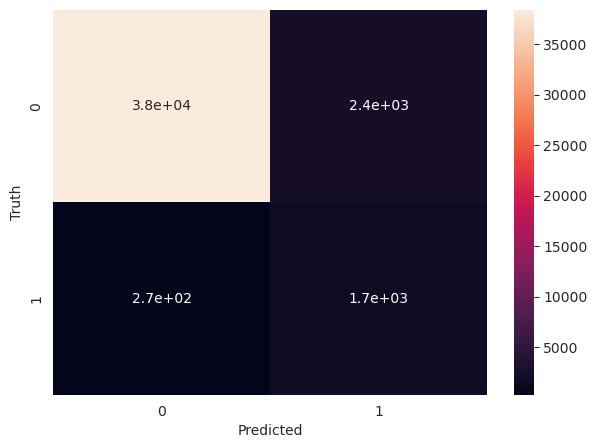

In [13]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     40832
           1       0.42      0.87      0.56      1988

    accuracy                           0.94     42820
   macro avg       0.70      0.90      0.76     42820
weighted avg       0.97      0.94      0.95     42820

